# ___pyOpTools_ Tutorial

In [1]:
from pyoptools.all import *

('Loading component library', 'Edmund', ' from files ', ['/home/wcamilo96/anaconda2/envs/pyoptools/lib/python2.7/site-packages/pyoptools/raytrace/library/Edmund/SphOptics1.cmp', '/home/wcamilo96/anaconda2/envs/pyoptools/lib/python2.7/site-packages/pyoptools/raytrace/library/Edmund/SphOptics.cmp'])


##  Display 3D

In order to visualize the optical systems and the raytracings the class *Plot3D* is used as follows:

```python
    Plot3D(Obj,center=(x,y,z),size=(a,b),rot=[(rx,ry,rz)],scale=s)
```

where: 

 $\quad$  *Obj* is the name of the optical element or system to be plotted
   
 $\quad$  *(x,y,z)* are the cartesian coordiantes of its center*
   
 $\quad$  *(a,b)* are the horizontal and vertical dimensions of the image
   
 $\quad$  *(rx,ry,rz)* are the rotation angles in radians around the axis x,y & z
   
 $\quad$ *s* is the scale of the image in the notebook.

>The y axis is pointing downwards and the z axis is pointing towards the screen.

<img style="float: left;width: 400px;" src="Repere.png">

## 1. Optical surfaces

The elemental objects in *pyOpTools* are the optical surfaces. Optical components and optical systems are just arrangements of optical surfaces. An optical surface is charcterised by its shape, its curvature and its reflectivity and as any other objet it has a position and an orientation.

### 1.1 Plane surfaces

Plane surfaces can be create as follows:

```python 
    P=Plane(shape=Shape(parameters=(,)),reflectivity=r)
```
The shape can be either *Circular*, *Rectangular* or *Triangular* and the parameter is the radius, the dimensions or the cartesian coordinates of the edges respectively.


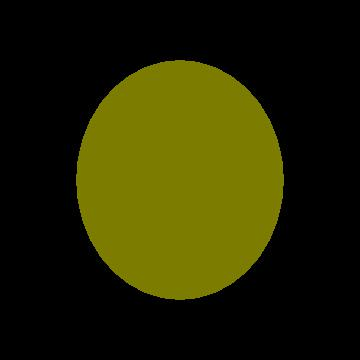

In [2]:
#Example : Plane surfaces

P1=Plane(shape=Circular(radius=(20)),reflectivity=1)
P2=Plane(shape=Rectangular(size=(40,25)))
P3=Plane(shape=Triangular(coord=((-15,15),(5,-20),(18,12))))


Plot3D(P1,center=(0,0,0),size=(60,60),rot=[(0,-pi/6,0)],scale=6)


### 1.2 Spherical surfaces

Shperical surfaces can be created as follows:

```python
        S=Spherical(curvature=c, shape=Shape(parameters=(,)),reflectivity=r)
```
Shape can be either *Circular* or *Rectangular*. The curvature c$=\frac{1}{R}$, where R is the radius of the sphere that generates the spherical surface.


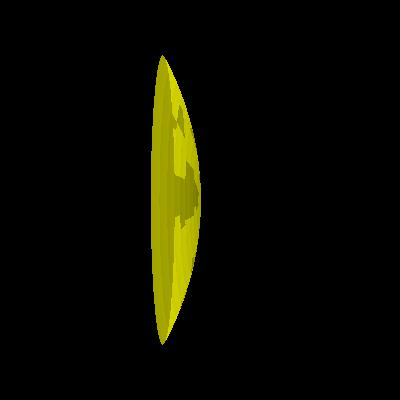

In [3]:
# Example : Spherical surface

S=Spherical(curvature=1/300., shape=Circular(radius=145.),reflectivity=1)

Plot3D(S,center=(0,0,0),size=(400,400),rot=[(0,-pi/1.9,0)],scale=1)

### 1.3 Cylinders and cylidrical surfaces

Circular cylinders and portions of them with different shapes and curvatures can be created in *pyOpTools*

```python
     S=Cylindrical(shape=Shape(parameters=(,)),curvature=c,reflectivity=r)
```
shape can be *Circular*  or *Rectangular* 

the entire cylinder is created as follows:

```python
    S=Cylinder(radius=r,length=l,reflectivity=r)
```



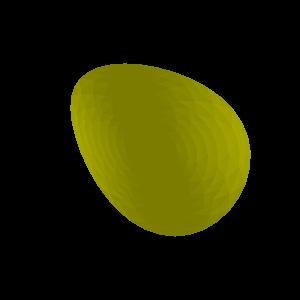

In [4]:
# Example : Circular cilynders with different shapes

S1=Cylinder(radius=36,length=100,reflectivity=1)
S2=Cylindrical(shape=Circular(radius=(50)),curvature=1/100.)
S3=Cylindrical(shape=Rectangular(size=(50,100)),curvature=1/20.)

Plot3D(S2,center=(0,0,0),size=(150,150),rot=[(pi/6,pi/6,0)],scale=2)

### 1.4 Aspheric surfaces 

There is also tthe possibility of creating aspherical surfaces. 

The expression of the aspheric surface is

$$Z=\frac{(A_x x^2+A_y y^2)}{(1+\sqrt{(1-(1+K_x)A_x^2 x^2-(1+K_y) A_y^2 y^2))}}+ poly2d()$$
Shperical aberration;
Idea:  Comparation of the spherical aberration

In [5]:
%%latex
$$Z=\frac{(A_x x^2+A_y y^2)}{(1+\sqrt{(1-(1+K_x)A_x^2 x^2-(1+K_y) A_y^2 y^2))}}+ poly2d()$$

<IPython.core.display.Latex object>

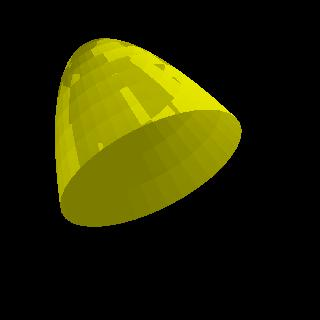

In [6]:
# Symmetric aspherical surface

sa=Aspherical(shape=Circular(radius=2.5),Ax=.2,Ay=.2,Kx=.1, Ky=.15, poly=poly2d((0,0,0,.5,0,.5)))
Plot3D(sa,center=(-2,-2,5),size=(8,8),rot=[(-3*pi/10,pi/4,0)],scale=40)

# 2. From Optical surfaces to Optical components

By properly linking some optical surfaces it is possible to build several optical components using the *pyOpTools* class *Component* as follows:
```python
    P=Component(surflist=[(S1,(x1,y1,z1),(rx1,ry1,rz1)),
                          (S2,(x2,y2,z2),(rx2,ry2,rz2)),
                          (S3,(x3,y3,z3),(rx3,ry3,rz3))],material=n)            
```
    
where 

$
    \quad S_i$ is the name of the i-th optical surface
    
$
    \quad(x_i,y_i,z_i)$ are the cartesian coordinates of its center
    
$
    \quad(rx_i,ry_i,rz_i)$ are the rotation angles in radians around the axis x,y & z


   $\quad$ n  is the refraction index of the optical component.
   
*pyOpTools* has a class called *material* which is meant to organize a wide catalogue of refractive indexes from several lens fabricants, among them:
- sumita
- ohara
- hoya
- corning
- hoya
- schott

To access the value of the refractive index: 

```python
    n=material.fabricant['ManofacturerTM']
```

To display all the Manofacturer's TradeMarks of the lenses availables 

```python
    material.fabricant.keys()
```



Component example

Predifined components

In [7]:
# Example of an optical component Prisme 90°

width=50
height=50
reflectivity=0.5
        
a_face= Plane(shape=Rectangular(size=(width,height)))
b_face= Plane(shape=Rectangular(size=(width,height)))


h=sqrt(2.)*width
h_face= Plane (shape=Rectangular(size=(h,height)),reflectivity=reflectivity)
        
w2=width/2.

e1=Plane (shape=Triangular(((-w2,w2),(-w2,-w2),(w2,-w2))))
e2=Plane (shape=Triangular(((-w2,w2),(-w2,-w2),(w2,-w2))))

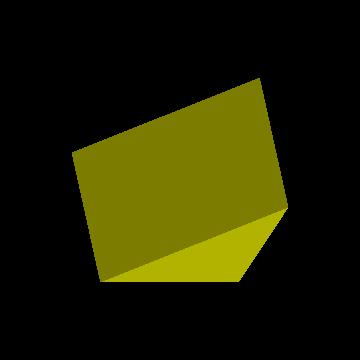

In [8]:
P=Component(surflist=[(a_face,(0,0,-width/2),(0,0,0)),
                      (b_face,(width/2,0,0),(0,pi/2,0)),
                      (h_face,(0,0,0),(0,-pi/4,0)),
                      (e1,(0,height/2,0),(pi/2,-pi/2,0)),
                      (e2,(0,height/2,0),(pi/2,-pi/2,0))
                      ],material=material.schott["BK7"])
Plot3D(P,size=(120,120),scale=3,rot=[(pi/6,pi/8,0)])

*pyOptools* includes **predefined optical components**

## 2.1 Lens

SphericalLens IdealLens, IdealTLens Comparision doublets and airspaced doublets

```python
    L1=SphericalLens(radius=r,curvature_s1=c1,curvature_s2=c2,thickness=d,material=n)
    
    L2=IdealLens(shape=Circular(radius=(r)),f=l)
    
    L=IdealLens(shape=Circular(radius=(25)), f=100)
```

> Puede haber problemas con la visualizacion  IdealTLenses





In [9]:
L1=SphericalLens(radius=25,curvature_s1=1/100.,curvature_s2=-1/100.,thickness=8,material=material.ohara['O_PBL2'])
#L=IdealTLens(shape=Circular(radius=(25)), f=100, d=10)

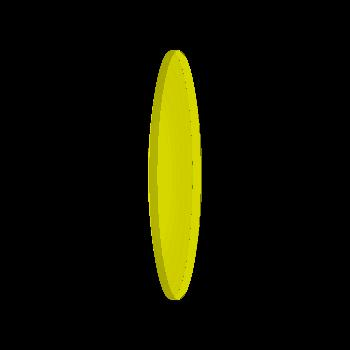

In [10]:
Plot3D(L1,center=(0,0,0),size=(70,70),rot=[(0,pi/1.8,0)],scale=5)

The class library from *pyOpTools* has the possibility to add a catalogue of lenses. The librery from *Copyright 2018, Edmund Optics Inc is included*. Other catalogues can be added and compatibility with Zemax libraries is under developpement.

```python
    L=library.Edmund.get("LENS_CODE")
```

The lenses code can be consulted in /pyoptools/raytrace/library/Edmund/SphOptics.cmp

## 2.2 Mirrors, stops & sensors

```pytho
m=RoundMirror(radius= 50., thickness=1, reflectivity = 0.5)
m2=RectMirror(size=(40,25,10), reflectivity = 0.5)
```


   Other kinds of mirrors by adjusting the shape size and reflectivity

```python
    AP=Stop(shape=Rectangular(size=(50,50)),ap_shape=Circular(radius=25))

    c=CCD()
```
    
    

In appeareance they look like simple surfaces but when interacnting with rays they have different propperties.
    

## 2.3 Optical prismes & beamsplitters

P0=RightAnglePrism(width=50,height=50,material=material.schott["BK7"],reflectivity=0)

bs=BeamSplitingCube(size=50,material=N_BK7,reflectivity=0.5)


CCD
RightAnglePrism, PentaPrism
Block, BeamSplitingCube
Stops


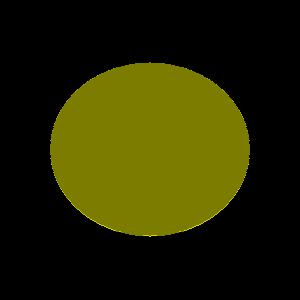

In [11]:
m=RoundMirror(radius= 50., thickness=1, reflectivity = 0.5)
m2=RectMirror(size=(40,25,10), reflectivity = 0.5)

Plot3D(m,center=(0,0,0),size=(150,150),rot=[(pi/6,0,0)],scale=2)

# Optical systems

In order to make ray tracing *pyOpTools* uses the class *System*. A System is constitued by a set of optical components arranged properly and a light beam.

By adding a CCD anywhere in the optical path it is possible to visualize the profile of the beam as it would be captured by an optical sensor.

## Optical systems without rays

First, we consider only an optical system without rays. Rays will be added later.

```python
    S=System(complist=[(C1,(x1,y1,z1),(rx1,ry1,rz1)),(C2,(x2,y2,z2),(rx2,ry2,rz2)),(C3,(x3,y3,z3),(rx3,ry3,rz3))],n=1)
```    
where

$
    \quad C_i$ is the name of the i-th optical component
    
$
    \quad(x_i,y_i,z_i)$ are the cartesian coordinates of its center
    
$
    \quad(rx_i,ry_i,rz_i)$ are the rotation angles in radians around the axis x,y & z


   $\quad$ *n*  is the refraction index of the medium in which the optical system is immersed
   






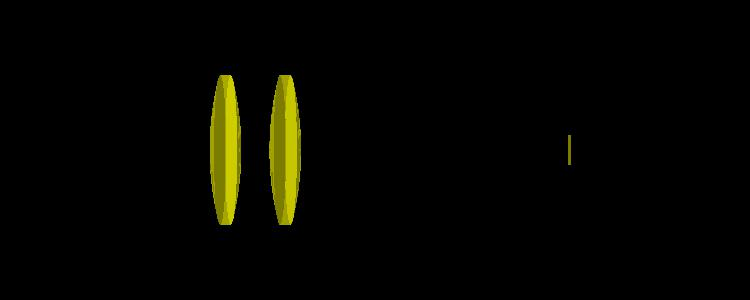

In [12]:
#Example, 2 predefined lenses and 1 CCD

#Hacer ejemplo con lentes predefinidas

L2=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])
L3=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])

C=CCD()

S=System(complist=[(L2,(0,0,100),(0,0,0)),(L3,(0,0,120),(0,0,0)),(C,(0,0,215),(0,0,0)) ],n=1)

Plot3D(S,center=(0,0,150),size=(250,100),scale=3,rot=[(0,pi/1.9,0)])

## Rays

In *pyOpTools* rays are lists containing the position of the ray's origin (x,y,z), its direction  in cartesian coordinates (ux,uy,uz) and its wavelength in $\mu$m.

```python
    R=[Ray(pos=(x,y,z),dir=(ux,uy,uz),wavelength=lambda)]
```
several rays can be generated under the same name.


It is also possible to create a beam of parallel rays or a beam of rays emitted from a point source.

```python
    PB=parallel_beam_c(origin=(x,y,z),direction=(rx,ry,rz),size=(a,b),num_rays=(na,nb),wavelength=lambda,label="")

    RS=point_source_c(origin=(x,y,z),direction=(rx,ry,rz),span=(alpha,beta),num_rays=(na,nb),wavelength=labmda,label="")
```                     
where 
    
    (x,y,z) are the coordinates of the origin of the central ray of the beam 
    
    (rz,ry,rz) are the rotation angles in radians around the axis x,y & z of the central ray of the beam
    
    (a,b) is the size of the beam in perpendicular directions to the propagation axis
    
    (na,nb) number of rays in perpendicular directions to the propagation axis
    
    (alpha,beta) are the angular dimensions of the beam in perpendicular directions to the propagation axis

> Ambiguedad en la direccion de span y size cuando apunta a angulos intermedios


> by default the beam points towards the positive z axis, it has a wavelength=0.58929, 10 rays and an angular size of $\frac{\pi}{8}$ or linear size of 1 depending on the case.



In order to add rays as a part of the optical system we use the method *ray_add*:

```python
    S.ray_add(R)
```
The method *propagate* allows to calculate the optical path that can be later visulized using Plot3D. 

```python
    S.propagate()
```    

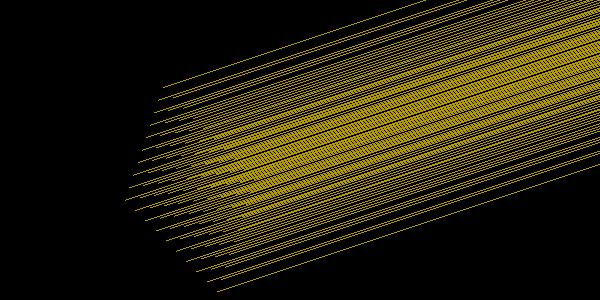

In [13]:
#Example:  visualization of a default parallel beam

S=System()
R=parallel_beam_c()

S.ray_add(R)
S.propagate()

Plot3D(S,center=(0.3,-0.4,0.6),size=(4,2),scale=150,rot=[(pi/4,pi/6,pi/4)])

An optical system in *pyOpTools* is made up by both rays and optical components. That is what is called and optical system.

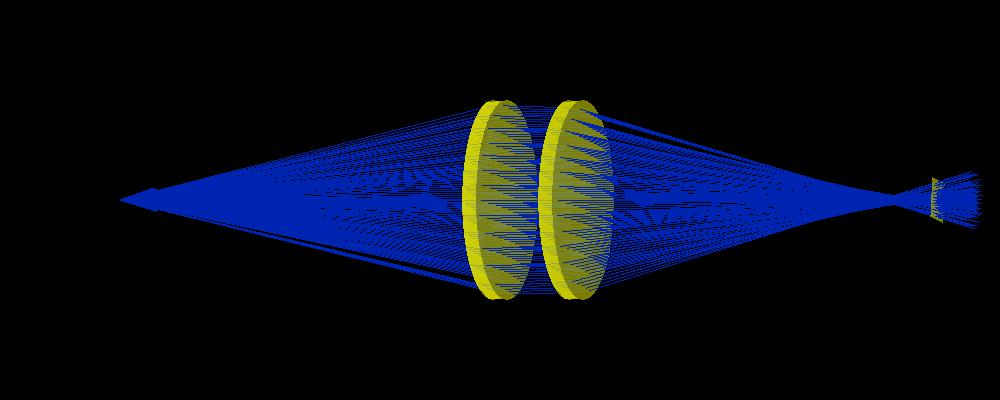

In [14]:
# Example 

L2=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])
L3=SphericalLens(radius=25,curvature_s1=1./100.,curvature_s2=-1./100,thickness=10,material=material.schott["BK7"])

C=CCD()

S=System(complist=[(L2,(0,0,100),(0,0,0)),(L3,(0,0,120),(0,0,0)),(C,(0,0,215),(0,0,0)) ],n=1)

R=point_source_c(origin=(0,0,0),direction=(0,0,0),span=(pi/6,pi/6),num_rays=(15,15),wavelength=0.45,label="")

S.ray_add(R)
S.propagate()
Plot3D(S,center=(0,0,100),size=(250,100),scale=4,rot=[(0,pi/2,0),(pi/20,-pi/10,0)])